<h1>
    <font color=0000FF>
        6.2 Exploring Relationships 
    </font>
</h1>

___

## This script contains the following:

### 1. Importing Visualization Libraries and Data
### 2. Data Cleaning
### 3. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
     
### 4. Questions for Analysis
### 5. Hypotheses
### 6. Exporting Data

---

## 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensuring charts are displayed in notebook without the need to call them 

%matplotlib inline

In [4]:
#Turn project folder path into a string

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [5]:
# Define path

path = r'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [7]:
path

'/Users/aysha/Documents/Achievement 6 - Global Suicide Rates/'

In [8]:
#Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'master_clean_df1_6_1.csv'), index_col = False)

---

## 2. Data Cleaning

#### Dropping Columns

In [9]:
df.shape

(27820, 11)

In [10]:
df.columns

Index(['Unnamed: 0', 'country', 'year', 'sex', 'age', 'count of suicides',
       'population', 'suicide rate', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
df.head()

,Unnamed: 0,country,year,sex,age,count of suicides,population,suicide rate,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [13]:
#Dropping column'Unnamed' from df

df = df.drop(columns = ['Unnamed: 0'])

---

## 3. Exploring relationships

### Correlations

In [15]:
# Create a correlation matrix using pandas

df.corr()

,year,count of suicides,population,suicide rate,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
count of suicides,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicide rate,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


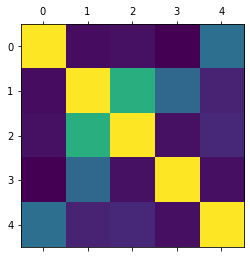

In [16]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

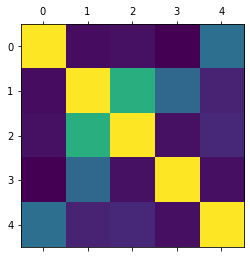

In [17]:
# Save figure
plt.matshow(df.corr())
plt.savefig("out.png") 

# This will save the image in the working directory. 

In [18]:
#current dir
cwd = os.getcwd()
cwd

'/Users/aysha/Documents/Taipei Dataset'

Text(0.5, 1.0, 'Correlation Matrix')

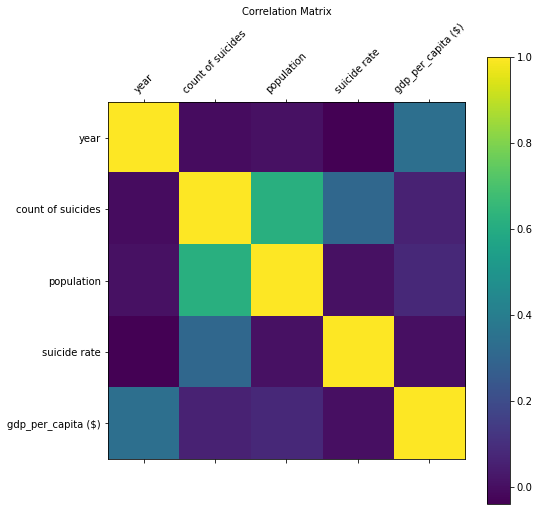

In [42]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=10) # add font size
plt.title('Correlation Matrix', fontsize=10) # add title

### Create a correlation heatmap using seaborn

In [43]:
df.columns

Index(['country', 'year', 'sex', 'age', 'count of suicides', 'population',
       'suicide rate', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation'],
      dtype='object')

In [44]:
# Create a subset excluding the "country", "age", "sex",  and "generation" columns

sub = df[['year', 'count of suicides', 'population', 'suicide rate', ' gdp_for_year ($) ', 'gdp_per_capita ($)']]

In [45]:
sub

,year,count of suicides,population,suicide rate,gdp_for_year ($),gdp_per_capita ($)
0,1987,21,312900,6.71,"2,156,624,900",796
1,1987,16,308000,5.19,"2,156,624,900",796
2,1987,14,289700,4.83,"2,156,624,900",796
3,1987,1,21800,4.59,"2,156,624,900",796
4,1987,9,274300,3.28,"2,156,624,900",796
...,...,...,...,...,...,...
27815,2014,107,3620833,2.96,"63,067,077,179",2309
27816,2014,9,348465,2.58,"63,067,077,179",2309
27817,2014,60,2762158,2.17,"63,067,077,179",2309
27818,2014,44,2631600,1.67,"63,067,077,179",2309


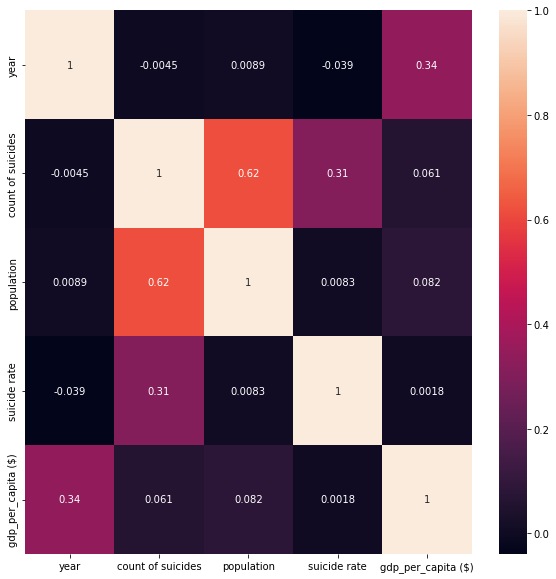

In [46]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Q. Discuss what the coefficients in the plot mean in terms of the relationships between the variables.


Looking at the heatmap, it seems like the only variables that have a medium-to-strong postive relationship are population and count of suicides, with a coefficient correlation of 0.62. So, as per the dataset and this heatmap, we can assume that there seems to be a higher number of suicides when population is high. I would like to point out that, there are several qualitative variables in the dataset and there can be other reasons behind suicide, for example, economic situation, mental health etc.

### Scatterplots

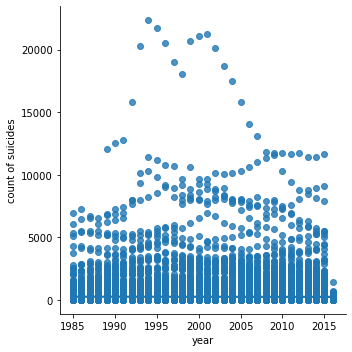

In [47]:
# Create a scatterplot for the "year" and "count of suicides" columns in seaborn

sns.lmplot(x = 'year', y = 'count of suicides', data = df)

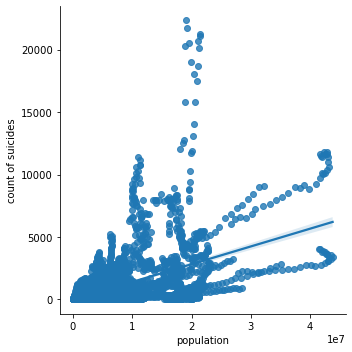

In [50]:
# Create a scatterplot for the "population" and "count of suicides" columns in seaborn

sns.lmplot(x = 'population', y = 'count of suicides', data = df)

While there is a general positive relationship between these two columns, there are still quite a few points that don’t correspond with the trend.
The non-linear trend, the outlier values, and the large number of points that don’t fall close to the trend line all show us that the correlation coefficient isn’t enough to produce a holistic view of the relationship between these two variables and may not be entirely accurate.

### Pair Plot

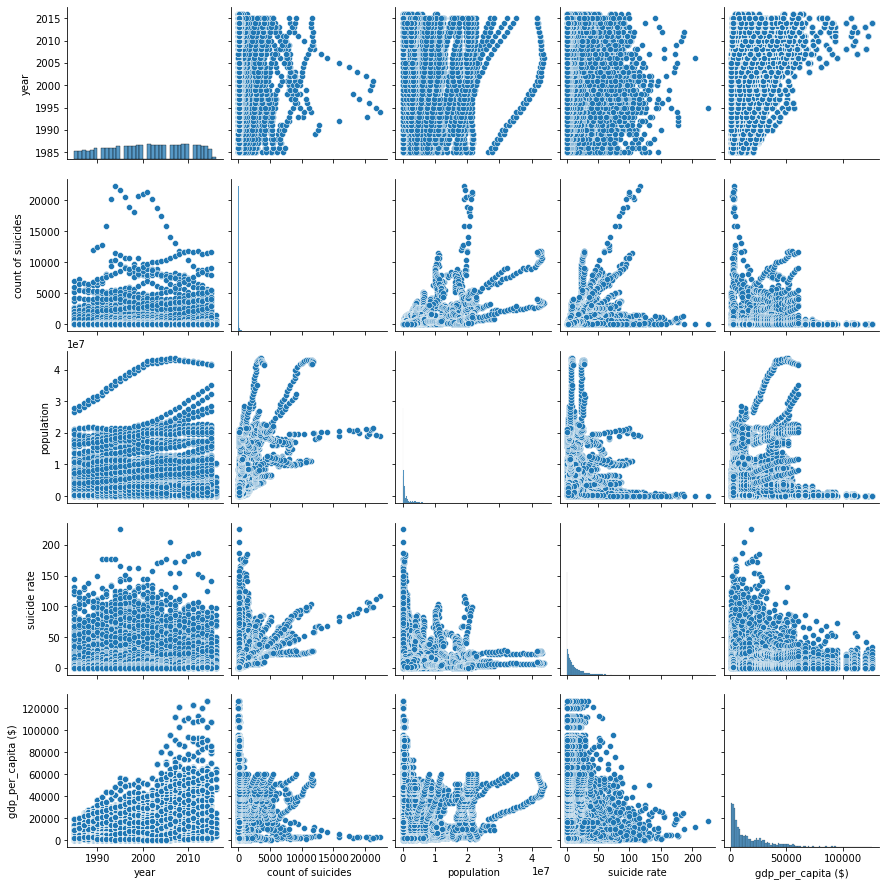

In [48]:
# Create a pair plot 

g = sns.pairplot(df)

This pair plot shows more variables and gives a bigger selection of charts to gain insights from. As per the pair plots above, we can say that **gdp_per_capital($)** variable can be used to compare with count of suicides and suicide rate (suicide per 100K people) as it shows a pattern in the above pair plots. 

Also, as stated above, there are qualitative variables in the dataset that will showcase the reasons behind global suicides over the years. In the dataset, we see that there's a column for gender, age groups, generation, country. In further analysis, I would like to explore the suicide trend as per these categories as well. 

### Categorical Plots

#### A. Creating a categorical variable that splits the "gdp_per_capita ($)" column into categories

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='Count'>

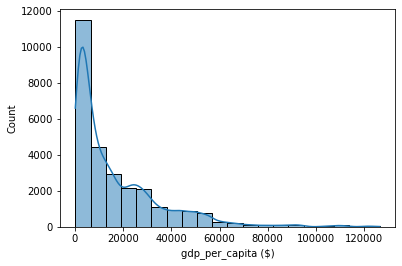

In [55]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['gdp_per_capita ($)'], bins = 20, kde = True)

In [56]:
df.loc[df['gdp_per_capita ($)'] < 40000, 'GDP'] = 'Low GDP'
df.loc[(df['gdp_per_capita ($)'] >= 40000) & (df['gdp_per_capita ($)'] < 80000), 'GDP'] = 'Medium GDP'
df.loc[df['gdp_per_capita ($)'] >= 80000, 'GDP'] = 'High GDP'

In [57]:
df['GDP'].value_counts(dropna = False)

Low GDP       24530
Medium GDP     2882
High GDP        408
Name: GDP, dtype: int64

In [58]:
df.columns

Index(['country', 'year', 'sex', 'age', 'count of suicides', 'population',
       'suicide rate', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'GDP'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the gdp_per_capita($) categories created above

sns.set(style="ticks")
g = sns.catplot(x="suicide rate", y="gdp_per_capita ($)", hue="GDP", data=df)

This file was interrupted due to a long waiting time, however the chart can be seen at the bottom. I created categories with the count of suicides variable and divided it into three categories which can be seen in the following cells.

#### B. Creating a categorical variable that splits the "count of suicides" column into categories

<AxesSubplot:xlabel='count of suicides', ylabel='Count'>

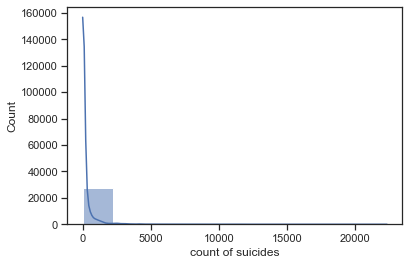

In [67]:
# Use a histogram to visualize the distribution of the variables. 

sns.histplot(df['count of suicides'], bins = 10, kde = True)

0-1500 low
1500 - 3000 medium 
3000 above high

In [68]:
df.loc[df['count of suicides'] < 1500, 'suicide level'] = 'Low'
df.loc[(df['count of suicides'] >= 1500) & (df['count of suicides'] < 3000), 'suicide level'] = 'Medium'
df.loc[df['count of suicides'] >= 3000, 'suicide level'] = 'High'

In [69]:
df['suicide level'].value_counts(dropna = False)

Low       26939
Medium      476
High        405
Name: suicide level, dtype: int64

In [70]:
df.columns

Index(['country', 'year', 'sex', 'age', 'count of suicides', 'population',
       'suicide rate', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'GDP', 'suicide level'],
      dtype='object')

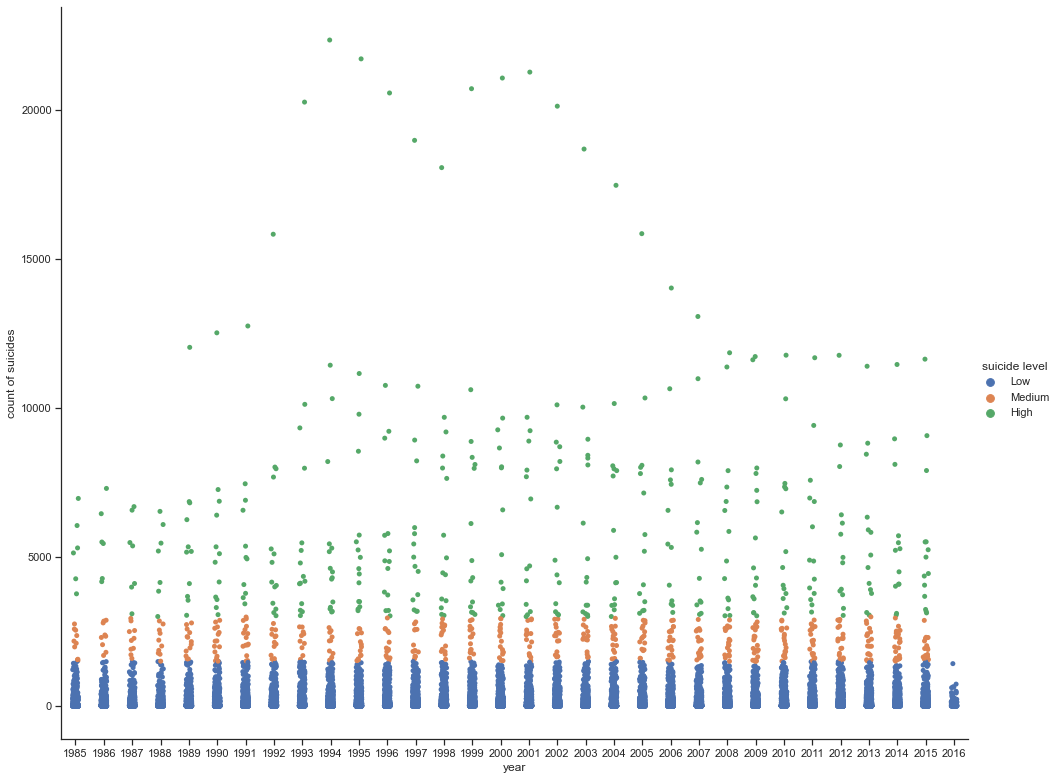

In [86]:
# Create a categorical plot in seaborn using the suicide level categories created above

sns.set(style="ticks")
g = sns.catplot(x="year", y="count of suicides", hue="suicide level", data=df, height=11, aspect=15/12)

In [87]:
# fig = g.get_figure()
g.savefig("out.png") 

# Again, the image will be saved in the working directory. 

As per the chart above, we can see that in some years there have been instances with very high suicides. We will look into this further in the next steps to see what was the cause behind this spike in some years. 

---

## 4. Questions for Analysis

#### Questions for analysis from previous exercise

1. What patterns can we see with regards to total number of suicides over the years?
2. Are suicides rates climbing or falling in various countries? What do suicides by country over the years look like?
3. What are the ten countries with highest and lowest suicide rates?
4. What variables (such as gender or age) can you find that might correlate to suicide rates?
5. What are the major factors behind suicides? Low gdp per capita, certain generation group, mental health reasons, etc?


#### Some key questions answered in parts: 
* We can say that gdp_per_capita has a correlation with suicide rates. 
* We can also say that suicides have been on the rise over the years. 
* With regards to the other questions, we will explore the dataset further for qualitative variables and look into finding the answers. 

---

## 5. Hypotheses


* If gdp_per_capital is greater than 80000, then suicide rates will be low. 
* If gdp_per_capital is less than or equal to 80000, then suicide rates will be high. 


---

## 6. Exporting dataset

In [89]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'master_clean_df1_6_2.pkl'))